# Exploratory Data Analysis and Visualization

## Objective

The objective in this notebook is as follows: 
1. Load the notebook from the web
2. Clean and wrangle the data into a tidy format
3. Propose a visualization that is relevant to addressing the question and to explore the data.
    * propose a high quality plot or set of plots of the same kind
    * explain why it is relevant in addressing the question or exploring the data

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# >>> Define paths to repository and data folder <<< #
repo_path  <- "https://raw.githubusercontent.com/fuminaba/STAT-301"
data_parent_path <- "/fuminaba-project/Data"

# >>> Load Training and Testing Data <<< #
data.train <- paste0(repo_path, data_parent_path, "/adult.data")  %>% 
    read_csv(col_names = F)
data.test  <- paste0(repo_path, data_parent_path, '/adult.test') %>% 
    read_csv(col_names = F, skip = 1)

# >>> Define feature names and rename columns <<< #
feature_names <- c('age', 'workclass', 'fnlwgt', 'education',
                   'education-num', 'marital-status', 'occupation',
                   'relationship', 'race', 'sex', 'capital-gain', 
                   'capital-loss', 'hours-per-week', 'native-country',
                   'income')

names(data.train) <- feature_names
names(data.test) <- feature_names

# >>> For EDA, we will combine train and test data <<< #
data.all <- rbind(data.train, data.test)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X2, X4, X6, X7, X8, X9, X10, X14, X15
dbl (6): X1, X3, X5, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 16281 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X2, X4, X6, X7, X8, X9, X10, X14, X15
dbl (6): X1, X3, X5, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
invisible(capture.output(DataExplorer::create_report(data = data.all)))



processing file: report.rmd

output file: D:/Fumi/STAT-301/2-EDA-and-Visualization/report.knit.md



Output created: D:/Fumi/STAT-301/2-EDA-and-Visualization/report.html



## Exploratory Data Analysis

The data of interest is the [`adult`](https://archive.ics.uci.edu/dataset/2/adult) dataset, a census dataset of 14 explanatory variables and one predicted variable of `income`, a binary variable which describes if a person makes less than or equal to $50k, (`income` = 0) or more than $50k (`income` = 1). The objective of this dataset is to predict whether an individual in the United States makes more than $50k per year based on the explanatory features measured in the census described below. 

| Variable Name | Description | Type of Variable | 
| --- | --- | --- | 
| `age` | Age of individual | Feature, Integer | 
| `workclass` | Categorical variable describing individuals' working class | Feature, Categorical | 
| `fnlwgt` | Unknown | Feature, Integer | 
| `education` | Describes the education level of an individual | Feature, Categorical | 
| `education-num` | Numerical description of education level | Feature, Integer | 
| `marital-status` | Married, not-married etc. of the individual | Feature, Categorical | 
| `occupation` | General description of individuals' job | Feature, Categorical | 
| `relationship` | Relationship status of individual | Feature, Categorical | 
| `race` | Race of individual | Feature, Categorical | 
| `sex` | Sex of individual | Feature, Categorical | 
| `capital-gain` | Capital gain of individual | Feature, Integer | 
| `capital-loss` | Capital loss of an individual | Feature, Integer | 
| `hours-per-week` | Hours worked per week | Feature, Integer | 
| `native-country` | Native country of individual | Feature, Categorical | 
| `income` | Binary >50K or <=50K income | Target, Categorical | 

For a prediction problem such as this one, plotting variable distributions stratified by their outcome class often provides insight into which variables are discriminatory of the target class. This dataset contains redundancies where some variables have both a numeric and categorical representation. (Such as `education` and `education-num`.) Thus when plotting distributions stratified by target class, we can plot the numeric representation. 

First, we will observe the factor levels in the target variable.

In [22]:
data.all$income %>% as_factor() %>% levels(.)

[1] "<=50K"  ">50K"   "<=50K." ">50K."

We see that there are four levels when we only expect two. The difference is that there is a '.' at the end of `<=50K` and `>50K`. However, in reality this does not make a difference in the predicted classes, thus we need to process this feature to remove the '.'. 

In [35]:
data.all$income <- data.all$income %>% str_remove('[*.]')
data.all <- data.all %>% 
    mutate(income = as_factor((income)))

data.all$income %>% as_factor() %>% levels(.)

[1] "<=50K" ">50K"

We have effectively fixed this problem. Now, we can generate a simple plot to visualize the distribution of `age` between the two `income` classes.

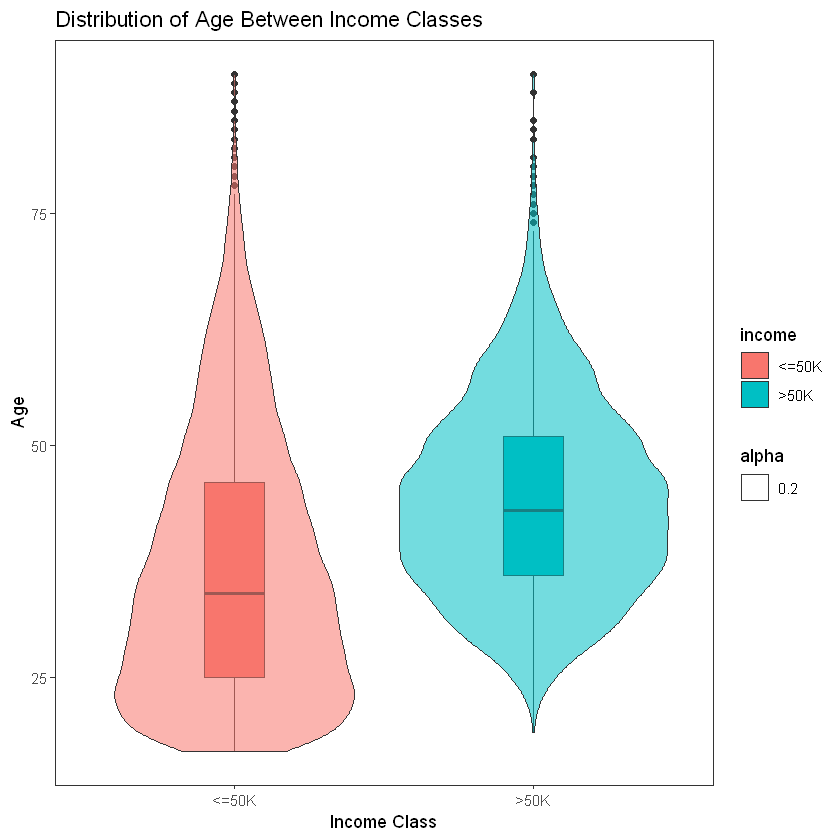

In [34]:
distribution.plot <- data.all %>% 
    ggplot(aes(x = income, y = age, fill = income)) + 
        geom_boxplot(width = 0.2) +
        geom_violin(aes(alpha = 0.2)) +
        labs(
            title = "Distribution of Age Between Income Classes",
            x = 'Income Class',
            y = 'Age') + 
        theme_bw() +
        theme(panel.grid.major = element_blank(),
              panel.grid.minor = element_blank())

distribution.plot

From the above plot alone, we learn that the distribution of `age` within the two income classes are different - the distribution for people that make less than $50,000 is a skewed distribution with majority of people in early 20s, whereas the people making more than $50,000 annually are more normally distributed.